# TIME SERIES SALES FORECASTING

## TECHNICAL GOALS
* Understand the data very well. Do all transformations / data engineering/etc. wherever applicable.
* Perform Exploratory Data Analysis(EDA).
* Carry out all the Data mining tasks.
* Identify the salient features that will determine the best results.
* Perform the model evaluation to select the appropriate algorithms.

## Preparing Data for Machine Learning

### Data Preparation

### Import the liabraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

# dickey fuller test for stationarity check
from statsmodels.tsa.stattools import adfuller,acf,pacf

from statsmodels.tsa.statespace.tools import diff

# pip install pmdarima
from pmdarima.arima import auto_arima

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

### Data Exploration

In [3]:
data=pd.read_excel("Proj4_TimeSeries_Sales_Data_Project.xls",index_col='Ship Date',parse_dates=True)
data

,Row ID,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Ship Date,,,,,,,,,,,,,,,,,,,,
2016-11-11,1,CA-2016-152156,2016-11-08,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2016-11-11,2,CA-2016-152156,2016-11-08,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2016-06-16,3,CA-2016-138688,2016-06-12,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
2015-10-18,4,US-2015-108966,2015-10-11,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
2015-10-18,5,US-2015-108966,2015-10-11,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-01-23,9990,CA-2014-110422,2014-01-21,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
2017-03-03,9991,CA-2017-121258,2017-02-26,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
2017-03-03,9992,CA-2017-121258,2017-02-26,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932


In [4]:
#data=data.sort_index()

In [5]:
#data

## Understanding data structure

### All columns

In [6]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

### structure of dataset

In [7]:
data.shape

(9994, 20)

In [8]:
data.size

199880

### Summary of dataset

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Row ID,9994.0,4997.500000,2885.163629,1.000,2499.25000,4997.5000,7495.750,9994.000
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.00000,56430.5000,90008.000,99301.000
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


In [10]:
data.describe(include = 'object').T

,count,unique,top,freq
Order ID,9994,5009,CA-2017-100111,14
Ship Mode,9994,4,Standard Class,5968
Customer ID,9994,793,WB-21850,37
Customer Name,9994,793,William Brown,37
Segment,9994,3,Consumer,5191
Country,9994,1,United States,9994
City,9994,531,New York City,915
State,9994,49,California,2001
Region,9994,4,West,3203
Product ID,9994,1862,OFF-PA-10001970,19


### Count of each columns or feature in the data set

In [11]:
data['Row ID'].value_counts()

1       1
6666    1
6659    1
6660    1
6661    1
       ..
3333    1
3334    1
3335    1
3336    1
9994    1
Name: Row ID, Length: 9994, dtype: int64

In [12]:
data['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [13]:
data['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [14]:
data['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

In [15]:
data['State'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

In [16]:
data['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [17]:
data['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [18]:
data['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [19]:
data['Quantity'].value_counts()

3     2409
2     2402
5     1230
4     1191
1      899
7      606
6      572
9      258
8      257
10      57
11      34
14      29
13      27
12      23
Name: Quantity, dtype: int64

In [20]:
data['Postal Code'].value_counts()

10035    263
10024    230
10009    229
94122    203
10011    193
        ... 
27534      1
53186      1
32503      1
94509      1
63376      1
Name: Postal Code, Length: 631, dtype: int64

In [21]:
data['Product ID'].value_counts()

OFF-PA-10001970    19
TEC-AC-10003832    18
FUR-FU-10004270    16
FUR-CH-10001146    15
TEC-AC-10003628    15
                   ..
TEC-PH-10003535     1
TEC-MA-10002937     1
OFF-AR-10004974     1
TEC-AC-10004814     1
OFF-ST-10001627     1
Name: Product ID, Length: 1862, dtype: int64

In [22]:
data['Discount'].value_counts()

0.00    4798
0.20    3657
0.70     418
0.80     300
0.30     227
0.40     206
0.60     138
0.10      94
0.50      66
0.15      52
0.32      27
0.45      11
Name: Discount, dtype: int64

In [23]:
data['Profit'].value_counts()

 0.0000     65
 6.2208     43
 9.3312     38
 3.6288     32
 5.4432     32
            ..
-22.6200     1
 5.4288      1
 15.4680     1
 8.6391      1
 72.9480     1
Name: Profit, Length: 7545, dtype: int64

In [24]:
data['Sales'].value_counts()

12.960     56
19.440     39
15.552     39
10.368     36
32.400     28
           ..
825.174     1
569.536     1
796.425     1
12.832      1
243.160     1
Name: Sales, Length: 6144, dtype: int64

In [25]:
data['Product Name'].value_counts()

Staple envelope                                                                        48
Staples                                                                                46
Easy-staple paper                                                                      46
Avery Non-Stick Binders                                                                20
Staples in misc. colors                                                                19
                                                                                       ..
Boston 1900 Electric Pencil Sharpener                                                   1
RCA ViSYS 25423RE1 Corded phone                                                         1
Canon Color ImageCLASS MF8580Cdw Wireless Laser All-In-One Printer, Copier, Scanner     1
Newell 342                                                                              1
Eldon Jumbo ProFile Portable File Boxes Graphite/Black                                  1
Name: Prod

### Checking for null values

In [26]:
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

#### We do not have any null values in the dataset so we do not require null value treatment.

In [27]:
data.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

### Dropping the columns or features which is not directly contributing to the target variable that is sales

In [28]:
data.drop(['Product Name'],axis=1,inplace=True)

In [29]:
data.head()

,Row ID,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Sales,Quantity,Discount,Profit
Ship Date,,,,,,,,,,,,,,,,,,,
2016-11-11,1,CA-2016-152156,2016-11-08,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,261.9600,2,0.00,41.9136
2016-11-11,2,CA-2016-152156,2016-11-08,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,731.9400,3,0.00,219.5820
2016-06-16,3,CA-2016-138688,2016-06-12,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,14.6200,2,0.00,6.8714
2015-10-18,4,US-2015-108966,2015-10-11,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,957.5775,5,0.45,-383.0310
2015-10-18,5,US-2015-108966,2015-10-11,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [30]:
data.shape

(9994, 19)

In [31]:
data1=data.sort_values('Order Date').reset_index()
data1.head(3)

,Ship Date,Row ID,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,2014-01-07,7981,CA-2014-103800,2014-01-03,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095,Central,OFF-PA-10000174,Office Supplies,Paper,16.448,2,0.2,5.5512
1,2014-01-08,740,CA-2014-112326,2014-01-04,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-LA-10003223,Office Supplies,Labels,11.784,3,0.2,4.2717
2,2014-01-08,741,CA-2014-112326,2014-01-04,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-ST-10002743,Office Supplies,Storage,272.736,3,0.2,-64.7748


In [32]:
#Check the time spam
data1['Order Date'].min(), data1['Order Date'].max()

(Timestamp('2014-01-03 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [33]:
#setting oder date as index number
data1.set_index("Order Date", inplace = True)


In [34]:
sales=data1['Sales']
sales.tail()

Order Date
2017-12-30      3.024
2017-12-30     52.776
2017-12-30     90.930
2017-12-30     13.904
2017-12-30    323.136
Name: Sales, dtype: float64

In [35]:
energy=sales.resample('M').mean()

<AxesSubplot:xlabel='Order Date'>

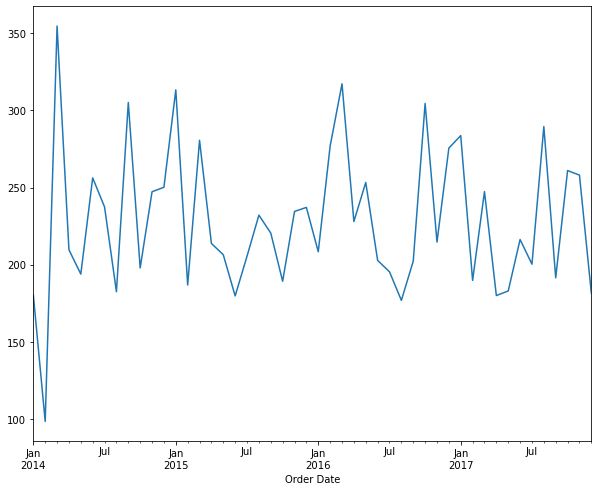

In [36]:
energy.plot(figsize=(10,8))

#### Showing the 4 years sale of furniture

## scaling of the data for better comparision

### Correlation

In [37]:
data1.corr()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Row ID,1.000000,0.009671,-0.001359,-0.004016,0.013480,0.012497
Postal Code,0.009671,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.001359,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,-0.004016,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.013480,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,0.012497,-0.029961,0.479064,0.066253,-0.219487,1.000000


In [38]:
corr=data1.corr()
corr.style.background_gradient(cmap='Accent')

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Row ID,1.000000,0.009671,-0.001359,-0.004016,0.013480,0.012497
Postal Code,0.009671,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.001359,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,-0.004016,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.013480,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,0.012497,-0.029961,0.479064,0.066253,-0.219487,1.000000


In [39]:
x=data1.corr()

<AxesSubplot:>

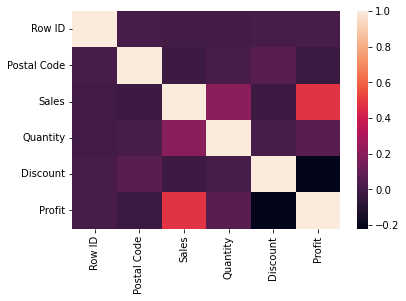

In [40]:
import seaborn as sns

sns.heatmap(x)

#### As we can see from the heatmap that the most correlated factor is sales which is going to affected by discount and profit.

## Visualization

## Characteristics of Time series

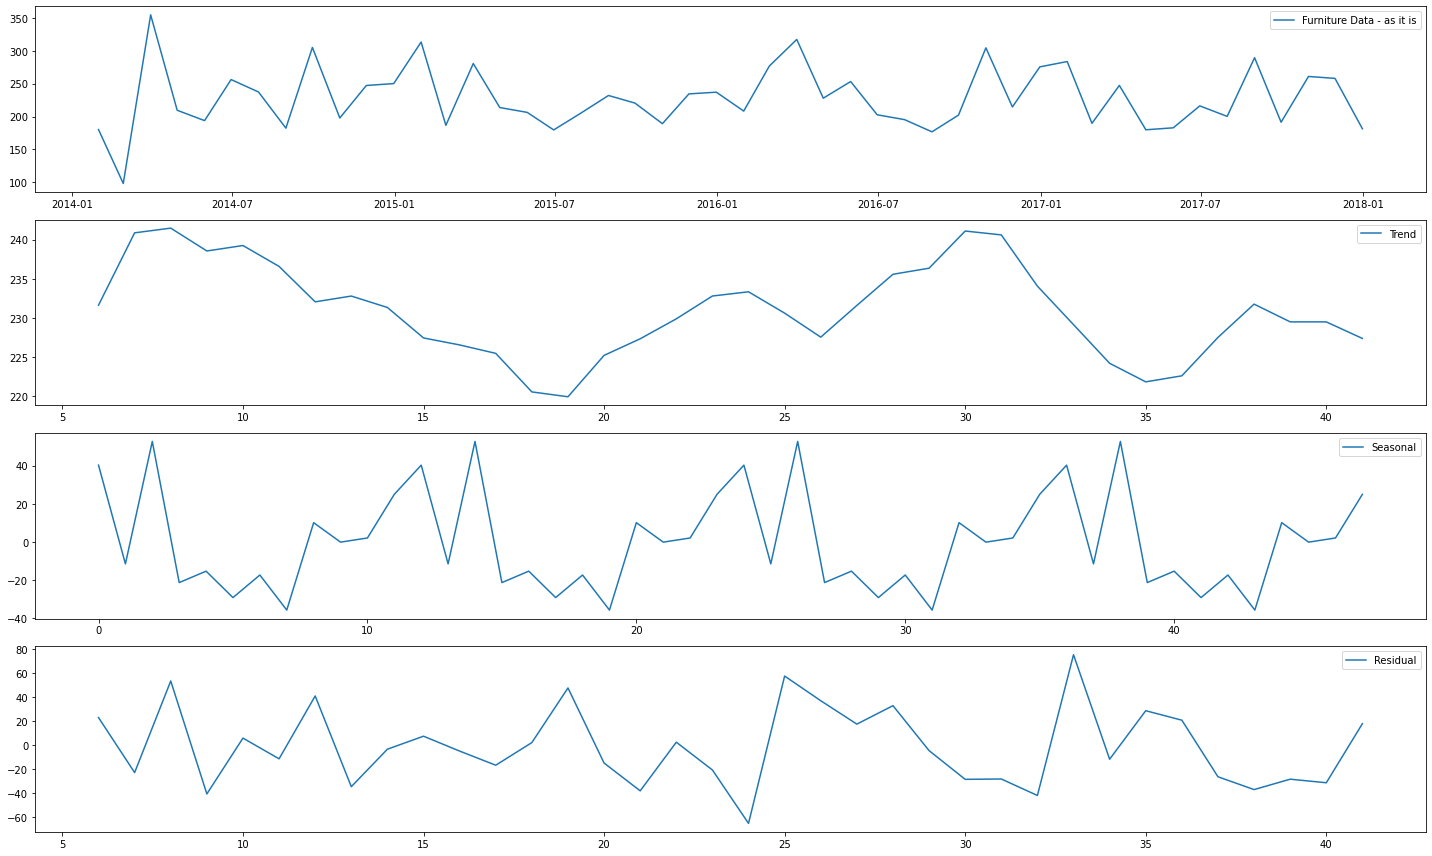

In [53]:
# different components of the Time series data
# period = 12 since the data is monthly

#decomposition=seasonal_decompose(closeprice, period=12)
decomposition=seasonal_decompose(np.asarray(energy), period=12)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid

# plotting all the 4 graphs
fig,ax = plt.subplots(4,1,figsize=(20,12))

plt.subplot(411)
plt.plot(energy,label='Furniture Data - as it is')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend(loc='best')

plt.tight_layout()

#### We can observe from the  above graph that the data has trend and is also seasonal.

## Checking  the  Stationarity

In [54]:
# dickey-fuller test for stationarity
def checkStationarity(data):
    pvalue = adfuller(data)[1]
    '''
    output:-> 
    1) test statistic, 
    2) p-value, 
    3) number of lags, 
    4) total observations
    
    '''
    
    if(pvalue>0.05):
        msg = 'p-value={}. Data is not stationary'.format(pvalue)
    else:
        msg='p-value={}. Data is stationary'.format(pvalue)
        
    return(msg)

In [55]:
# check the data for stationarity
ret=checkStationarity(sales); 
ret

'p-value=0.0. Data is stationary'

#### We are doing ADF test that is augumented dicky fuller test to check the stionarity of the data.

## Plotting  ACF(Autocorrelation factor) and PACF(Partial auto-correlation factor)

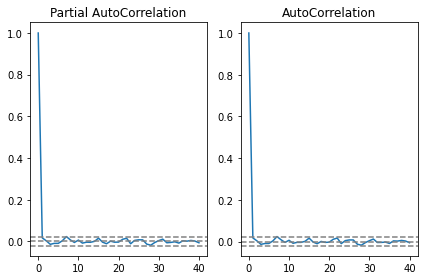

In [56]:
# p -> PACF (partial autocorrelation graph)
# q -> ACF (auto correlation graph)
# d -> differential level (from top)

# since, lags cannot be determined at the beginning, set a random number initially
lag_acf = acf(sales.dropna(), nlags=40)
lag_pacf = pacf(sales.dropna(), nlags=40, method='ols')

# plot PACF (p)
plt.subplot(121)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color="gray")
plt.axhline(y=-1.96/np.sqrt(len(sales)),linestyle='--',color="gray")
plt.axhline(y=1.96/np.sqrt(len(sales)),linestyle='--',color="gray")
plt.title("Partial AutoCorrelation")

# plot ACF (q)
plt.subplot(122)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color="gray")
plt.axhline(y=-1.96/np.sqrt(len(sales)),linestyle='--',color="gray")
plt.axhline(y=1.96/np.sqrt(len(sales)),linestyle='--',color="gray")
plt.title("AutoCorrelation")

plt.tight_layout()

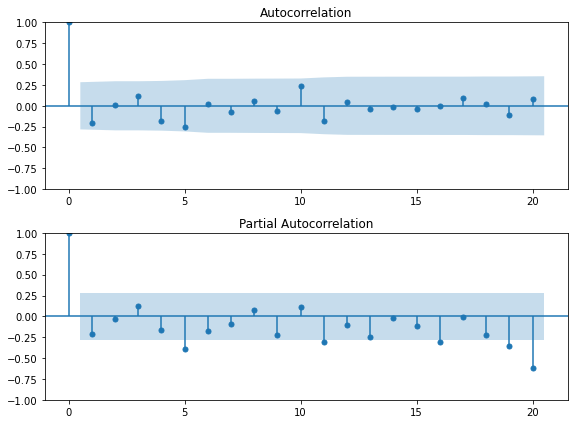

In [57]:
fig = plt.figure(figsize=(8, 6))

# Show ACF
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(energy, lags=20, ax=ax1)

# Show PACF
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(energy, lags=20, ax=ax2)

plt.tight_layout()

#### Fromt the above graphs we can observe that the good value of p from Autocorrelation(ACF)  is 2 and value of q from Partial autocorrelation(PACF) is also 2

### split the data into train and test 

In [58]:
# split the data into train and test 
# total 48 months are there so I choose accordingly
train = energy.iloc[:40]
test = energy.iloc[40:]
print("train = {}, test = {}".format(len(train), len(test)))

train = 40, test = 8


## ARMA MODEL

### Use ARMA for selection of p, d, q

In [75]:
from statsmodels.tsa.arima_model import ARMA
# With p=1
ar_m1 = ARIMA(test, order = (1,0,0))
m1 = ar_m1.fit()
print(m1.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                    8
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -39.798
Date:                Sun, 27 Nov 2022   AIC                             85.596
Time:                        19:31:15   BIC                             85.835
Sample:                    05-31-2017   HQIC                            83.989
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        226.1803     11.187     20.218      0.000     204.254     248.106
ar.L1         -0.4796      0.434     -1.106      0.269      -1.330       0.370
sigma2      1186.7076   1526.049      0.778      0.4

In [76]:
# With p=2
ar_m2 = ARIMA(test, order = (2,0,0))
m2 = ar_m2.fit()
print(m2.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                    8
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 -39.713
Date:                Sun, 27 Nov 2022   AIC                             87.426
Time:                        19:31:24   BIC                             87.744
Sample:                    05-31-2017   HQIC                            85.283
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        227.1851      9.269     24.511      0.000     209.019     245.352
ar.L1         -0.5789      0.536     -1.079      0.281      -1.630       0.472
ar.L2         -0.1679      0.454     -0.370      0.7

In [77]:
# predictions
predictions = m2.predict(0,len(test)-1)
print(predictions)

Order Date
2017-05-31    227.185074
2017-06-30    249.137399
2017-07-31    240.949432
2017-08-31    244.592729
2017-09-30    195.601508
2017-10-31    237.413572
2017-11-30    213.614720
2017-12-31    203.637662
Freq: M, Name: predicted_mean, dtype: float64


In [78]:
# actual vs predicted values
# print("test = {}, predicted = {}".format(len(test), len(predictions) ))
actual = []; pred = []

for i in range(len(predictions)):
    actual.append(test[i])
    pred.append(predictions[i])

df_res1 = pd.DataFrame({'actual':actual, 'predicted':pred})
df_res1['err'] = df_res1.actual - df_res1.predicted
print(df_res1)

       actual   predicted        err
0  182.897150  227.185074 -44.287925
1  216.251942  249.137399 -32.885457
2  200.285027  240.949432 -40.664406
3  289.545358  244.592729  44.952629
4  191.430614  195.601508  -4.170894
5  260.996387  237.413572  23.582815
6  258.056264  213.614720  44.441544
7  181.448742  203.637662 -22.188920


### # LJung-Box test

In [79]:

pvalue = sm.stats.acorr_ljungbox(m2.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

Fail-to-Reject H0. Good model


###  MSE

In [81]:

p=2; q=0;d=0
msg1 = 'ARIMA Model. Order=(' + str(p) + ',' + str(d) + ',' + str(q) + ')'
mse1 = mean_squared_error(df_res1.actual, df_res1.predicted)
print(msg1 + "\n\tMSE = {}\n\tRMSE = {}".format(mse1,np.sqrt(mse1)))

ARIMA Model. Order=(2,0,0)
	MSE = 1219.768849543621
	RMSE = 34.925189327240886


Text(0.5, 1.0, 'ARIMA Model. Order=(2,0,0)')

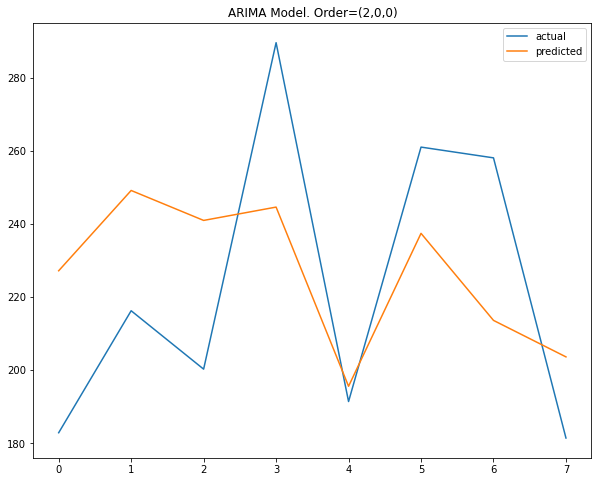

In [82]:
df_res1.actual.plot(figsize=(10,8),legend=True)
df_res1.predicted.plot(legend=True)
plt.title(msg1)

#### The orange line in the graph is predicted sales values.

## ARIMA MODEL

### Using  AUTO ARIMA for selection of p, d, q

In [197]:
# auto ARIMA (to help in the selection of p,d,q)
m1 = auto_arima(data1['diff_sales'].dropna(),start_p=0,max_p=5, start_q=0,max_q=5, seasonal=False, trace=True)
print(m1.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1220.876, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1188.219, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1157.033, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=1116.739, Time=0.03 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=1113.732, Time=0.04 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=1105.691, Time=0.06 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=1092.527, Time=0.13 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=1100.315, Time=0.07 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=1093.045, Time=0.18 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=1086.843, Time=0.13 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=1086.672, Time=0.15 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1113.274, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1101.554, Time=0.07 sec
 ARIMA(3,0,3)(0,0,0)[0]             : 

#### From AUTO ARIMA the is Best model: ARIMA(3,0,1)(0,0,0)[0]             : AIC=1101.554, Time=0.07 secbased on the least AIC value
* THe lowest value for AIC ids considered to be good for the model.

## Building  the ARIMA model

In [62]:
# start with initial values for p and q based on auto_arima recommendation
p=3; d=0; q=1
m3 = ARIMA(train,order=(p,1,q)).fit()
print(m3.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   40
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -208.323
Date:                Sun, 27 Nov 2022   AIC                            426.646
Time:                        17:46:07   BIC                            434.963
Sample:                    01-31-2014   HQIC                           429.630
                         - 04-30-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1987      0.248     -0.801      0.423      -0.685       0.287
ar.L2         -0.0098      0.279     -0.035      0.972      -0.556       0.537
ar.L3          0.1900      0.299      0.636      0.5

### Predicting  the test data using the model

In [63]:
 #predictions
start = len(train) 
end = len(train) + len(test) - 1

print('start = {}, end = {}'.format(start,end))

predictions = m3.predict(start,end,typ='levels')
print(predictions)

start = 40, end = 47
2017-05-31    231.259915
2017-06-30    232.671943
2017-07-31    219.069091
2017-08-31    231.515345
2017-09-30    229.444587
2017-10-31    227.148847
2017-11-30    229.990323
2017-12-31    229.054874
Freq: M, Name: predicted_mean, dtype: float64


### Converting the forcasted values in the dataframe

In [64]:
forecast=pd.DataFrame(m3.forecast(16))  #the forecast values for the future 16 quaters which is next 4 years
forecast

,predicted_mean
2017-05-31,231.259915
2017-06-30,232.671943
2017-07-31,219.069091
2017-08-31,231.515345
2017-09-30,229.444587
2017-10-31,227.148847
2017-11-30,229.990323
2017-12-31,229.054874
2018-01-31,228.776559
2018-02-28,229.380981


In [65]:
actual = []; pred = []

for i in range(len(predictions)):
    actual.append(test[i])
    pred.append(predictions[i])

df_res3 = pd.DataFrame({'actual':actual, 'predicted':pred})
df_res3['err'] = df_res3.actual - df_res3.predicted
print(df_res3)

       actual   predicted        err
0  182.897150  231.259915 -48.362765
1  216.251942  232.671943 -16.420001
2  200.285027  219.069091 -18.784065
3  289.545358  231.515345  58.030013
4  191.430614  229.444587 -38.013973
5  260.996387  227.148847  33.847540
6  258.056264  229.990323  28.065940
7  181.448742  229.054874 -47.606132


### # LJung-Box test

In [66]:
# LJung-Box test
pvalue = sm.stats.acorr_ljungbox(m3.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

Fail-to-Reject H0. Good model


In [67]:
# MSE
msg3 = 'ARIMA Model. Order=(' + str(p) + ',' + str(d) + ',' + str(q) + ')'
mse3 = mean_squared_error(df_res3.actual, df_res3.predicted)
print(msg3 + "\n\tMSE = {}\n\tRMSE = {}".format(mse3,np.sqrt(mse3)))

ARIMA Model. Order=(3,0,1)
	MSE = 1496.7069745208123
	RMSE = 38.687297327686416


### Graph for actual vs predicted sales

Text(0.5, 1.0, 'ARIMA Model. Order=(3,0,1)')

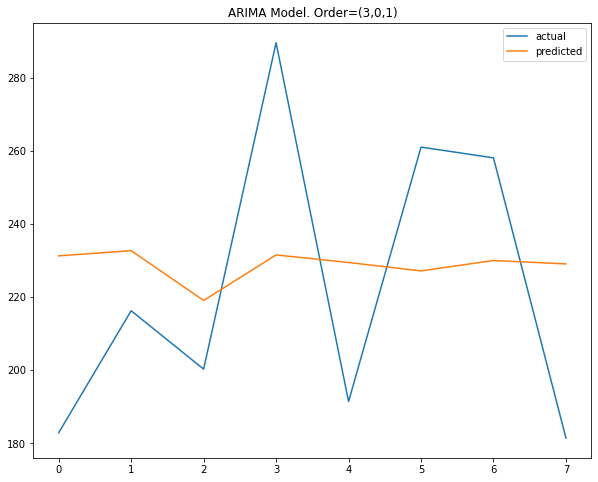

In [68]:
df_res3.actual.plot(figsize=(10,8),legend=True)
df_res3.predicted.plot(legend=True)
plt.title(msg3)

#### Orange line in the graph shows the prediction of the test data

## SARIMA MODEL

### Building the SARIMA model

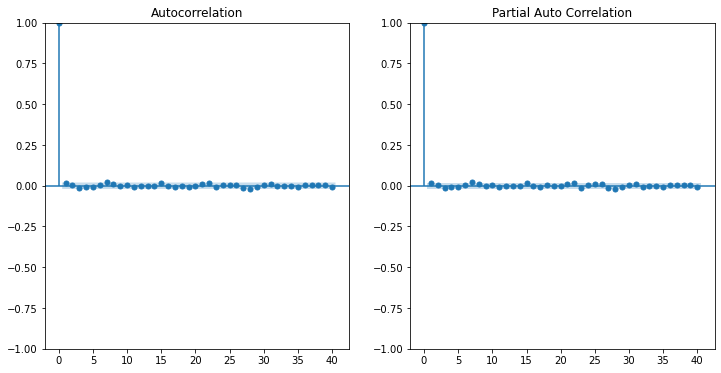

In [69]:
# ACF and PACF plots
ROWS = 1; COLS = 2
fig,ax = plt.subplots(ROWS,COLS,figsize=(12,6))

plot_acf(sales[30:], lags=40, ax=ax[0]);
plt.title("Auto Correlation")

plot_pacf(sales[30:], lags=40, ax=ax[1]);
plt.title("Partial Auto Correlation")

plt.show()

In [70]:
p=3; d=0; q=1
m4 = sm.tsa.statespace.SARIMAX(train,order=(p,d,q),seasonal_order=(p,d,q,12)).fit()
print(m4.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   40
Model:             SARIMAX(3, 0, 1)x(3, 0, 1, 12)   Log Likelihood                -216.521
Date:                            Sun, 27 Nov 2022   AIC                            451.041
Time:                                    17:49:27   BIC                            466.241
Sample:                                01-31-2014   HQIC                           456.537
                                     - 04-30-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1550      0.430      0.361      0.718      -0.687       0.997
ar.L2          0.3585      0.258   

###  #predictions


In [71]:
 #predictions
start = len(train) 
end = len(train) + len(test) - 1

print('start = {}, end = {}'.format(start,end))

predictions = m4.predict(start,end,typ='levels')
print(predictions)

start = 40, end = 47
2017-05-31    200.424026
2017-06-30    183.059360
2017-07-31    180.726133
2017-08-31    195.511181
2017-09-30    188.188836
2017-10-31    186.522857
2017-11-30    193.095074
2017-12-31    197.697764
Freq: M, Name: predicted_mean, dtype: float64


In [72]:
start = len(train)
end = len(train) + len(test) - 1

print('start = {}, end = {}'.format(start,end))

predictions = m4.predict(start=start,end=end,dynamic=True)

df_res4 = pd.DataFrame({'actual':actual, 'predicted':predictions})
df_res4['err'] = df_res4.actual - df_res4.predicted
df_res4.head()

start = 40, end = 47


,actual,predicted,err
2017-05-31,182.897150,200.424026,-17.526877
2017-06-30,216.251942,183.059360,33.192582
2017-07-31,200.285027,180.726133,19.558894
2017-08-31,289.545358,195.511181,94.034177
2017-09-30,191.430614,188.188836,3.241778


### # MSE

In [73]:
# MSE
msg4 = 'SARIMA Model. Order=(' + str(p) + ',' + str(d) + ',' + str(q) + ')'
mse4 = mean_squared_error(df_res4.actual, df_res4.predicted)
print(msg4 + "\n\tMSE = {}\n\tRMSE = {}".format(mse4,np.sqrt(mse4)))

SARIMA Model. Order=(3,0,1)
	MSE = 2584.339791756955
	RMSE = 50.8364022306551


Text(0.5, 1.0, 'SARIMA Model. Order=(3,0,1)')

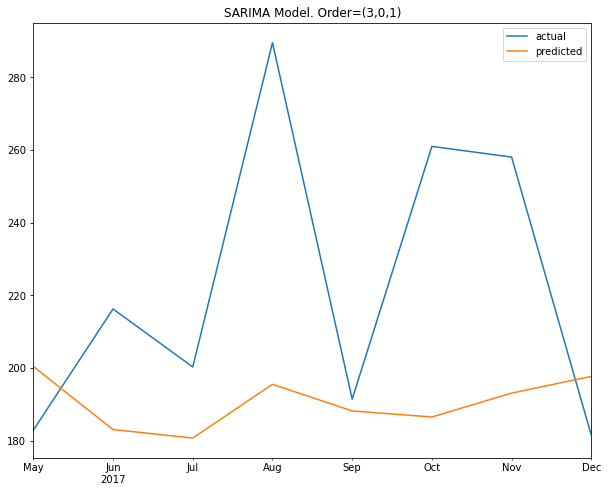

In [74]:
df_res4.actual.plot(figsize=(10,8),legend=True)
df_res4.predicted.plot(legend=True)
plt.title(msg4)

### Conclusion:

#### 
* The difference between ARIMA and SARIMA (SARIMAX) is about the seasonality of the dataset. if your data is seasonal, like it happen after a certain period of time. then we will use SARIMA.
* The model for which the values of criteria are smallest is considered as the best model. 
* The difference between ARMA and ARIMA is the integration part. The integrated I stands for the number of times differencing is needed to make the times series stationary.